In [1]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn as sns
import pandas as pd
import rubisco_data

from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
raw_kin_df, kin_df = rubisco_data.load_rubisco_data()

# Subset the data in various ways for future use
raw_kin_df, savir_df, nonsavir_df = rubisco_data.filter_data(raw_kin_df)

# Merge multiple measurements of the same organism by taking the median value.
merged_kin_df = rubisco_data.merge_organisms(raw_kin_df)

# Group by RuBisCO form
grouped_form = merged_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = sns.xkcd_palette(cnames)

In [3]:
print(raw_kin_df.shape[0], 'total WT RuBisCOs')
print(raw_kin_df.species.unique().size, 'total unique species')
print(kin_df.shape[0], 'RuBisCOs with all core kinetic data measured')
print(merged_kin_df.shape[0], 'data points post-merge')

378 total WT RuBisCOs
304 total unique species
208 RuBisCOs with all core kinetic data measured
305 data points post-merge


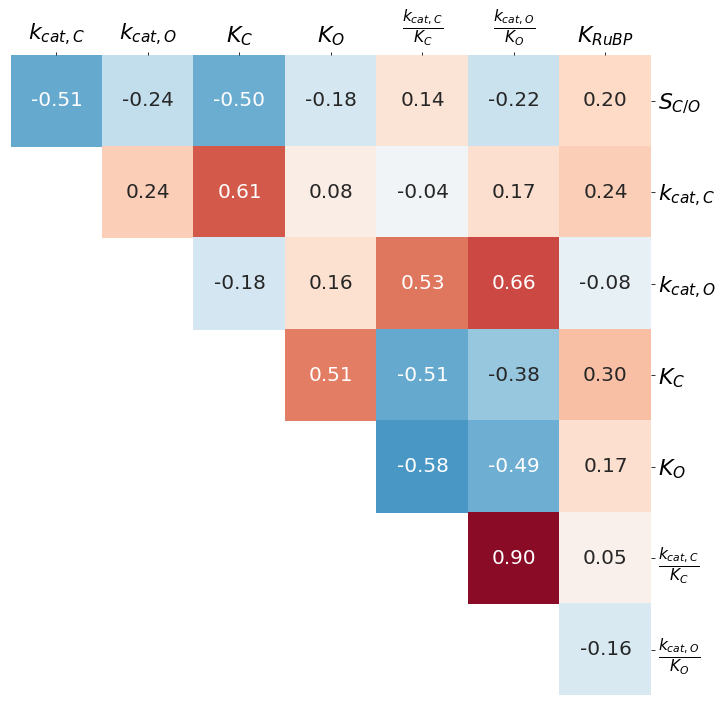

In [4]:
# Summary of linear-scale correlations among FI Rubiscos
cols = ['S', 'vC', 'vO', 'KC', 'KO', 'kon_C', 'kon_O', 'KRuBP',]
titles = {'S': '$S_{C/O}$', 'vC': '$k_{cat,C}$', 'KC':
          '$K_C$', 'vO': '$k_{cat,O}$', 'KO': '$K_O$',
          'KRuBP': '$K_{RuBP}$',
          'kon_C': '$\\frac{k_{cat,C}}{K_C}$',
          'kon_O': '$\\frac{k_{cat,O}}{K_O}$'}
ticks = [titles[c] for c in cols]

# Can calculate correlation matrix with pandas, but it doesn't give pvals. 
all_FI = merged_kin_df[merged_kin_df.isoform == '1']
lin_corrM = all_FI[cols].corr()
lin_corrM += np.diag([np.NaN] * len(cols))
lin_corrM = np.triu(lin_corrM)
lin_corrM[np.where(lin_corrM == 0)] = np.NaN

        
figure = plt.figure(figsize=(10, 10))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

sns.heatmap(lin_corrM[:-1,1:], square=True, center=0, 
            cmap="RdBu_r", vmin=-1, vmax=1,
            annot=True, cbar=False, annot_kws={'fontsize': 20}, fmt='.2f')

xax = figure.get_axes()[0]
xax.xaxis.tick_top()
xax.yaxis.tick_right()

tickrange = np.arange(len(cols)-1) + 0.5
plt.xticks(tickrange, ticks[1:], fontsize=22)
plt.yticks(tickrange, ticks[:-1], fontsize=22, rotation='horizontal')
#plt.tick_params(
#    axis='both',       # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    top=False,         # ticks along the top edge are off
#    right=False)       # ticks along the right edge are off

plt.tight_layout()
plt.savefig('figS8/figS8_FI_all_lincorr_standalone.svg')
plt.savefig('figS8/figS8_FI_all_lincorr_standalone.png', dpi=400)

plt.show()

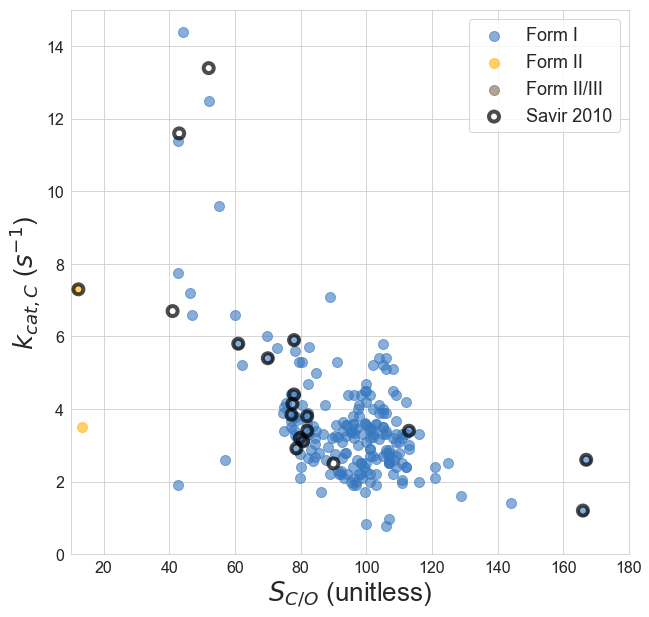

In [5]:
# Plot S vs. Vc coloring by RuBisCO form in linear scale
figure = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    if group == '3':
        continue
    label = 'Form %s' % groups[group]
    c = named_colors[i]
    plt.scatter(gdf.S, gdf.vC, c=[c], s=100, label=label, alpha=0.6)

# Show savir data with an outline
plt.scatter(savir_df.S, savir_df.vC, c='None', edgecolors='k',
            linewidths=4, s=100, label='Savir 2010', alpha=0.7, zorder=10)

plt.legend(loc=1, fontsize=18, frameon=True)
plt.xlabel('$S_{C/O}$ (unitless)', fontsize=26)
plt.ylabel('$k_{cat,C}$ ($s^{-1}$)', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(10, 180)
plt.ylim(0.01, 15)

plt.savefig('figS8/figS8_kcatC_S_lincorr_FI.svg')
plt.savefig('figS8/figS8_kcatC_S_lincorr_FI.png', dpi=600)

plt.show()

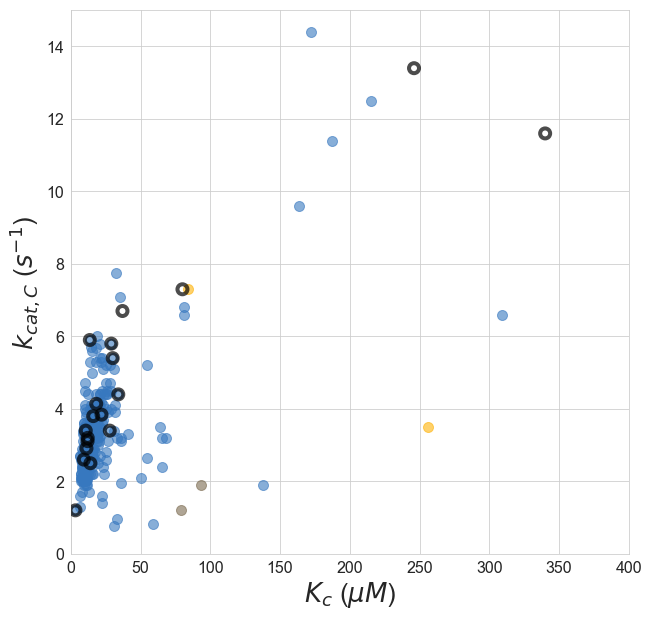

In [6]:
# Plot Kc vs. Vc coloring by RuBisCO form in linear scale
figure = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    if group == '3':
        continue
    label = 'Form %s' % groups[group]
    c = named_colors[i]
    plt.scatter(gdf.KC, gdf.vC, c=[c], s=100, label=label, alpha=0.6)

# Show savir data with an outline
plt.scatter(savir_df.KC, savir_df.vC, c='None', edgecolors='k',
            linewidths=4, s=100, label='Savir 2010', alpha=0.7, zorder=10)

#plt.legend(loc=2, fontsize=18, frameon=True)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=26)
plt.ylabel('$k_{cat,C}$ ($s^{-1}$)', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(0.001, 15)
plt.xlim(0, 400)

plt.savefig('figS8/figS8_kcatC_KC_lincorr_FI.svg')
plt.savefig('figS8/figS8_kcatC_KC_lincorr_FI.png', dpi=600)

plt.show()

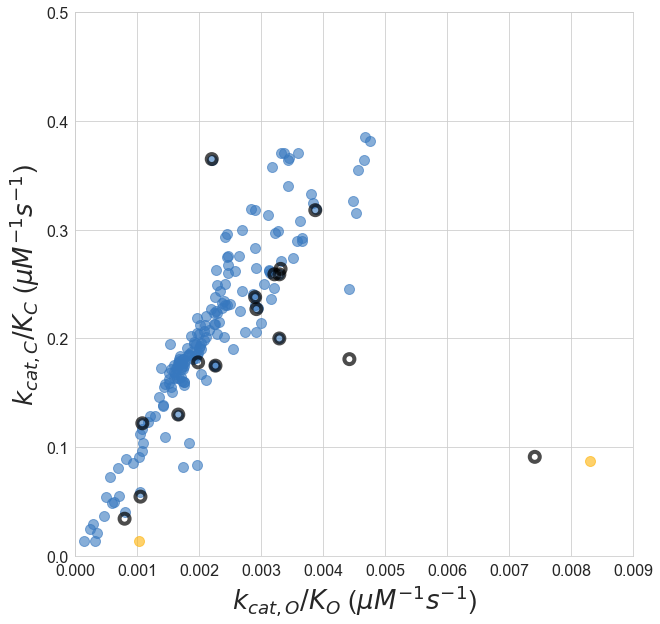

In [7]:
# Mechanistic proposal #2 from Savir - k_onC vs k_onO
figure = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

groups = {'1': 'I', 
          '2': 'II',
          '2_3': 'II/III', 
          '3': 'III'}

for i, (group, gdf) in enumerate(grouped_form):
    if group == '3':
        continue
    label = 'Form %s' % groups[group]
    c = matplotlib.colors.rgb2hex(named_colors[i])
    plt.scatter(gdf.kon_O, gdf.kon_C,  c=[c], s=100, label=label, alpha=0.6)

# Show savir data with an outline
plt.scatter(savir_df.kon_O, savir_df.kon_C, c='None', edgecolors='k',
            linewidths=4, s=100, label='Savir 2010', alpha=0.7, zorder=10)

#plt.legend(loc=1, fontsize=16, frameon=True)
plt.xlabel('$k_{cat,O} / K_O$ ($\mu M^{-1} s^{-1}$)', fontsize=26)
plt.ylabel('$k_{cat,C} / K_C$ ($\mu M^{-1} s^{-1}$)', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0, 0.009)
plt.ylim(0, 0.5)

plt.savefig('figS8/figS8_konC_konO_FI.png', dpi=600)
plt.savefig('figS8/figS8_konC_konO_FI.svg')

plt.show()